In [1]:
from glob import glob
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import os
import pandas as pd
import h5py
import tqdm
import natsort

from skimage.io import imread
from skimage.transform import resize

In [3]:
start_path = os.path.join(os.getcwd(),'Dataset')
files = sorted(os.listdir(start_path))
all_image_files = []
for i in files:
    all_image_files.append(os.path.join(start_path, i))
                
print(all_image_files)
for index, i in enumerate(all_image_files):
    data = glob(os.path.join(i,"*.jpg"))
    vars()[files[index]] = natsort.natsorted(data)
#Initialized Variables for all of the image folders
Expert_A[0]
Expert_B[0]
Expert_C[0]
Expert_D[0]
Expert_E[0]
Original128[0]
Original256[0]
Original512[0]

['/home/jason/Documents/CMPS-4720-6720/Dataset/Expert_A', '/home/jason/Documents/CMPS-4720-6720/Dataset/Expert_B', '/home/jason/Documents/CMPS-4720-6720/Dataset/Expert_C', '/home/jason/Documents/CMPS-4720-6720/Dataset/Expert_D', '/home/jason/Documents/CMPS-4720-6720/Dataset/Expert_E', '/home/jason/Documents/CMPS-4720-6720/Dataset/Original128', '/home/jason/Documents/CMPS-4720-6720/Dataset/Original256', '/home/jason/Documents/CMPS-4720-6720/Dataset/Original512']


'/home/jason/Documents/CMPS-4720-6720/Dataset/Original512/Original_1.jpg'

In [6]:
#List of all lists containing image paths
len(Expert_A[0]) #128x128
Expert_B[0] #128x128
Expert_C[0] #256x256
Expert_D[0] #128x128
Expert_E[0] #512x512
Original128[0] 
Original256[0]
len(Original512)

5000

In [7]:
def imread(path):
    return scipy.misc.imread(path).astype(np.float)
def resize_width(image, width=256.):
    h, w = np.shape(image)[:2]
    return scipy.misc.imresize(image,[int((float(h)/w)*width),width])
        
def center_crop(x, height=256):
    h= np.shape(x)[0]
    j = int(round((h - height)/2.))
    return x[j:j+height,:,:]
def get_image(image_path, width=256, height=256):
    return center_crop(resize_width(imread(image_path), width = width),height=height)

In [8]:
def _crop(im, rw, rh, sx, sy):
    im = resize(im, (rw, rh), order=1, preserve_range=False, mode='constant')
    im = im[sx:sx+64, sy:sy+64,:]*2 - 1
    im = np.transpose(im, (2, 0, 1)).astype(float)
    return im

In [18]:
test = get_image(Original512[0], 64, 64)

In [19]:
test.shape

(64, 64, 3)

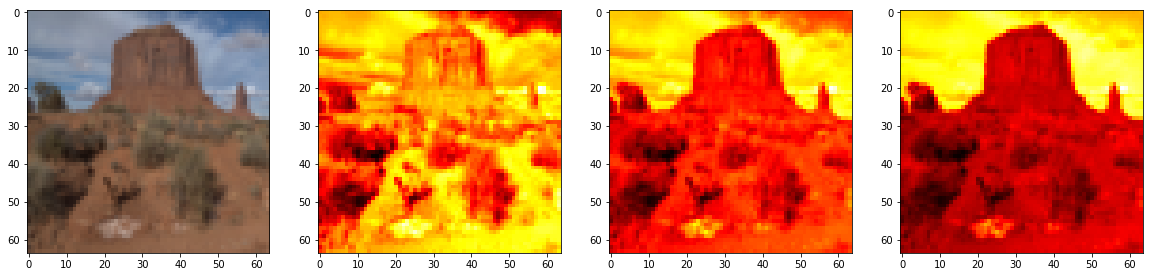

In [21]:
dim = 64
cm = plt.cm.hot
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,8))
ax[0].imshow(np.reshape(test, (dim,dim,3)), interpolation='nearest')
ax[1].imshow(np.reshape(test, (dim,dim,3))[:,:,0], interpolation='nearest', cmap=cm)
ax[2].imshow(np.reshape(test, (dim,dim,3))[:,:,1], interpolation='nearest', cmap=cm)
ax[3].imshow(np.reshape(test, (dim,dim,3))[:,:,2], interpolation='nearest', cmap=cm)
plt.show(fig)

In [25]:
dim1 = 128
dim2 = 256
dim3 = 512
images128 = np.zeros((len(Expert_A), dim1*dim1*3), dtype = np.uint8)
images256 = np.zeros((len(Expert_C), dim2*dim2*3), dtype = np.uint8)
images512 = np.zeros((len(Expert_E), dim3*dim3*3), dtype = np.uint8)
for i in tqdm.tqdm(range(len(Expert_A))):
    image128 = get_image(Expert_A[i], dim1, dim1)
    images128[i] = image128.flatten()
    image256 = get_image(Expert_C[i],dim2, dim2)
    images256[i] = image256.flatten()
    image512 = get_image(Expert_E[i], dim3, dim3)
    images512[i] = image512.flatten()

100%|██████████| 5000/5000 [02:34<00:00, 32.09it/s]
